In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist



In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype(float)/255, x_test.astype(float)/255


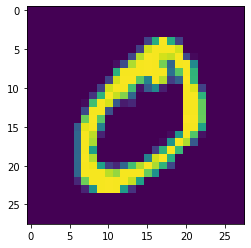

In [4]:
plt.imshow(x_train[1])

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
from tensorflow.keras.layers import Dense,Reshape,Input
from tensorflow.keras.models import Model

In [8]:
in_layer1 = Input(shape=(28,28))
l1 = Reshape(target_shape=(784,))(in_layer1)
l2 = Dense(units=100,activation="relu")(l1)
l3 = Dense(units=30,activation="relu")(l2)
l4 = Dense(units=100,activation="relu")(l3)
l5 = Dense(units=784,activation="relu")(l4)
out_layer = Reshape(target_shape=(28,28))(l5)

In [9]:
model = Model(in_layer1,out_layer)


In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               79184     
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0     

In [13]:
model.compile(optimizer="adam",loss="mse")


In [14]:
model.fit(x_train,x_train,batch_size=200,epochs=20)

Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0362

In [16]:
gen = model.predict(x_test[:1000])

In [17]:
gen.shape



(1000, 28, 28)

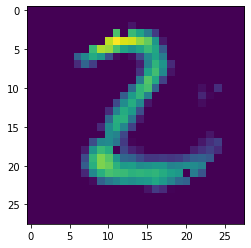

In [19]:
plt.imshow(gen[1])

In [20]:
model.layers